In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
import pandas as pd
import torch
import os
import matplotlib.pyplot as plt

2024-05-12 18:53:23.903547: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-05-12 18:53:24.366327: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-12 18:53:25.732849: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


### AutoEncoder Model

In [4]:
## Define the autoencoder architecture
# number of features
input_dim = 4
# desire dimention of encoded representation
encoding_dim = 32

# Input is used to instantiate a tensor representing the input data
input_data = Input(shape=(input_dim,))
# Dense creates a fully connected layer, encoding_dim is the number of neurons
# (input_data) connect the layer to the data
encoded = Dense(encoding_dim, activation='relu')(input_data)
layer2=Dense(encoding_dim,activation='relu')(encoded)
layer3=Dense(encoding_dim,activation='relu')(layer2)
layer4=Dense(encoding_dim,activation='relu')(layer3)
layer5=Dense(encoding_dim,activation='relu')(layer4)
decoded = Dense(input_dim, activation='sigmoid')(layer5)

# Create the autoencoder model
autoencoder = Model(input_data, decoded)

# Compile the model
autoencoder.compile(optimizer='adam', loss='MSE')

下一步： 把数据按照早中晚各取一段拼接作为一个患者的数据

### Training

In [5]:
## Generate some random data for demonstration
directory = '/home/fyyy0407/RL/Deep_Q_Learning/T2DM' 
all_data= pd.DataFrame()
i=1
losses = []
for filename in os.listdir(directory):
    if i== 15:
        break
    try:
        file_path = os.path.join(directory, filename)
        data = pd.read_csv(file_path)
        
        # Exclude the first column from data
        data = data.iloc[:, 1:]   # data.shape=(n,4)
        # Train the autoencoder
        history=autoencoder.fit(data, data, epochs=500, batch_size=32, shuffle=True)
        losses.append(history.history['loss'][-1])
    except Exception as e:
        # Print error message
        print(f"Error reading file '{filename}': {e}")
        # Continue to the next file
        continue
    i+=1

# Plot the losses
plt.plot(losses)
plt.title('Loss Over Training Sessions')
plt.xlabel('Training Session')
plt.ylabel('Loss')
plt.show()

Epoch 1/500
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 4270.3901 
Epoch 2/500
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4166.0811
Epoch 3/500
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4302.2002
Epoch 4/500
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 4191.6714 
Epoch 5/500
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 4282.8125 
Epoch 6/500
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 4282.2163 
Epoch 7/500
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 4412.0991 
Epoch 8/500
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 4271.0210 
Epoch 9/500
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 4247.3521 
Epoch 10/500
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 4235.6333 
Epoch 11/500
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4255.4619
Epoch 12/500
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 4370.6890 
Epoch 13/500
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 4357.1011 
Epoch 14/500
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4324.4473
Epoch 15/500
36/36 

KeyboardInterrupt: 

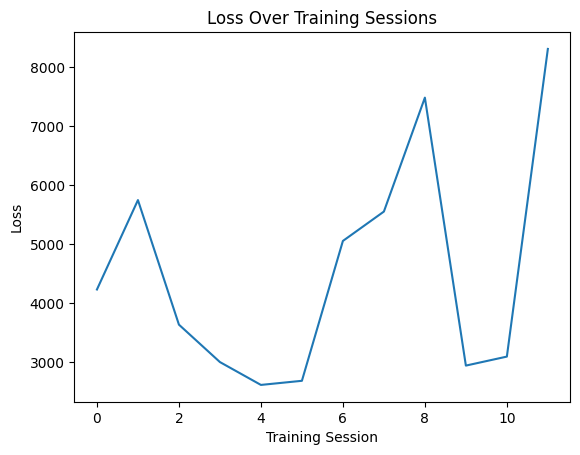

In [6]:

# Plot the losses
plt.plot(losses)
plt.title('Loss Over Training Sessions')
plt.xlabel('Training Session')
plt.ylabel('Loss')
plt.show()

### obtain the result

In [ ]:
# Use the autoencoder for encoding and decoding
encoder = Model(input_data, encoded)
encoded_data = encoder.predict(data)

decoded_data = autoencoder.predict(data)